<a href="https://colab.research.google.com/github/pankaj-beldar/Capstone_Project_04_Project_Netflix_Movies_and_TV_Shows_Clustering/blob/main/Capstone_Project_04_Project_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <font color='blue'>**Capstone_Project_04_Project_Netflix_Movies_and_TV_Shows_Clustering**</font>

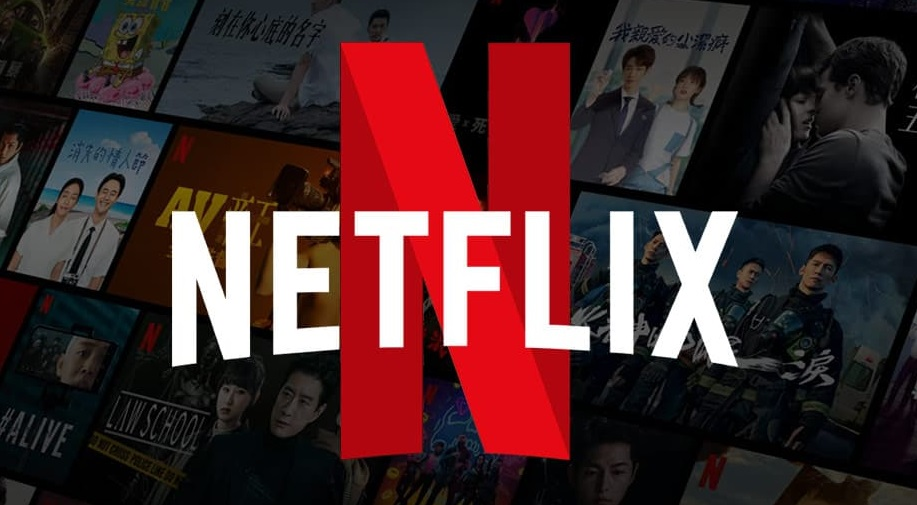

# <font color='green'>**Problem Statment**</font>


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, you are required to do**
* Exploratory Data Analysis

* Understanding what type content is available in different countries

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

 
# <font color='green'>**Attribute Information**</font>
1. **show_id** : Unique ID for every Movie / Tv Show

2. **type** : Identifier - A Movie or TV Show

3. **title** : Title of the Movie / Tv Show

4. **director**: Director of the Movie

5. **cast** : Actors involved in the movie / show

6. **country** : Country where the movie / show was produced

7. **date_added** : Date it was added on Netflix

8. **release_year** : Actual Releaseyear of the movie / show

9. **rating** : TV Rating of the movie / show

10. **duration** : Total Duration - in minutes or number of seasons

11. **listed_in** : Genere

12. **description**: The Summary description

# <font color='red'>**Milestones**</font>
1. Importing Libraries
2. Import Data
3. Data Overview
4. Data Visualization
5. Data Cleaning ( EDA )
6. Feature Selection
7. Model Selection
8. Hyperparameter Tuning
9. Conclusion

# <font color='green'>**1. Let's Invite Usefull Libraries**</font>
**Import Required Libraries for EDA**




In [12]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

**sklearn**

In [13]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

**Natural Language Processing**

In [14]:
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**libraries for clustering**

In [15]:
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# <font color='green'>**2. Let's Imports Data**</font>

**Mounting google drive**

In [16]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Loading our dataset**

In [17]:
# Loading our dataset from gogle drive and creating a pandas dataframe
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [18]:
# Exploring first 5 rows for better understanding of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [19]:
# exploring Sample 5 rows of dataset
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3355,s3356,TV Show,Khelti Hai Zindagi Aankh Micholi,NaN,"Ulka Gupta, Gautami Kapoor, Reema Shaikh, Vina...",India,"April 1, 2017",2013,TV-14,1 Season,"International TV Shows, TV Dramas",The life of a 14-year-old girl is thrown into ...
5947,s5948,Movie,Sword Masters: Two Champions of Shaolin,Cheh Chang,"Meng Lo, Sheng Chiang, Li Wang, Siu-Ho Chin, F...",Hong Kong,"August 16, 2018",1980,R,101 min,"Action & Adventure, International Movies",Shaolin warrior Tung Chien-chen is injured in ...
4630,s4631,TV Show,Once Upon a Time,NaN,"Ruby, Mohamed Farraag, Ahmed Dawood, Sawsan Ba...",Egypt,"December 9, 2020",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fighting to save his ancestors' mansion from d...
4188,s4189,Movie,Monster High: Escape from Skull Shores,"Steve Ball, Andrew Duncan","Kate Higgins, Debi Derryberry, Salli Saffioti,...",United States,"January 1, 2018",2012,TV-Y7,46 min,Children & Family Movies,A swanky cruise veers off course for Lagoona a...
3816,s3817,Movie,Luka Chuppi,Laxman Utekar,"Kartik Aaryan, Kriti Sanon, Pankaj Tripathi, V...",India,"June 7, 2019",2019,TV-PG,125 min,"Comedies, International Movies, Romantic Movies","Pretending to marry in order to cohabitate, a ..."


# <font color='green'>**3. Data Overview**</font>

**Getting feature names**

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Looking for total no. of observations and features**

In [21]:
df.shape

(7787, 12)

**Checking info our dataset**

In [23]:
# Checking info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Inference- 
1. There are total 7787 entities and 12 features in our dataset.

**Handling Null values**

In [30]:
#Checking Null Values
null_df= pd.DataFrame(df.isnull().sum())
null_df.reset_index(inplace=True)
null_df

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,507
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


**Plot Missing Values**

Text(0.5, 1.0, 'Missing Values in Dataset')

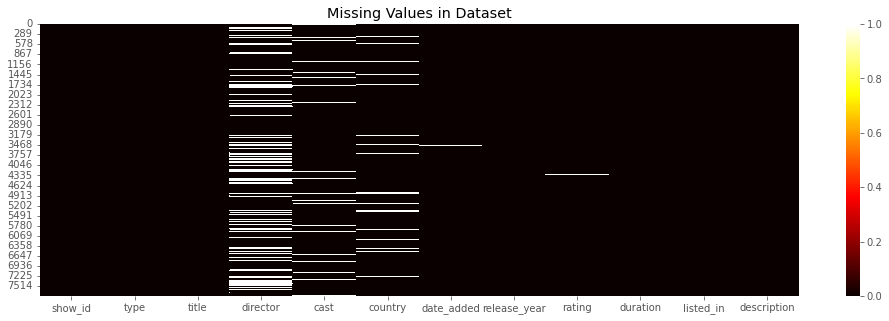

In [35]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cmap='hot',cbar=True)
plt.title('Missing Values in Dataset')

Inference- 

1. The attribute 'diector','cast','country','date_added','rating' consists of missing values.

**Handling Missing Value**

**checking duplicate values**

In [ ]:
#  checking duplicate values 
df.duplicated().sum()